<a href="https://colab.research.google.com/github/raphaelchaves/papa-linguas/blob/main/Projeto_PLN_ICMC_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://4.bp.blogspot.com/-tbAWK7KCPq0/TbVg-SmjNFI/AAAAAAAAAtQ/QboG2_SDuNo/s1600/logo+fiinal.jpg" width="300">


#Análise de Sentimentos

Projeto sobre análise de sentimentos desenvolvido como parte da disciplina de Processamento em Língua Natural. Postgraduate @ ICMC-USP

## Principais Etapas:
1. **Coleta de Dados**
2. **Pré-processamento de Dados**
3. **Análise Exploratória dos Dados**
4. **Visualização dos Dados**

### 1ª Etapa: Carregando Bibliotecas Necessárias:


In [65]:
# Bibliotecas requeridas para a leitura do dataset
import requests
import zipfile
import io
import pandas as pd

# Bibliotecas requeridas para a leitura do dataset
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from wordcloud import WordCloud

# Tokenização
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



### 1ª Etapa: Coleta de Dados


In [66]:
# URL do arquivo ZIP no GitHub
url = 'https://github.com/raphaelchaves/papa-linguas/raw/main/b2w.csv.zip'

# Passo 1: Fazer o download do arquivo ZIP
response = requests.get(url)

# Garantir que a requisição foi bem-sucedida
if response.status_code == 200:
    print("Get request efetuado com sucesso!")
else:
    print("Falha ao ler o arquivo")

# Passo 2: Ler o CSV diretamente do ZIP sem extraí-lo
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    # Passo 3: Abrir o arquivo CSV dentro do ZIP e carregá-lo diretamente no Pandas
    with zip_ref.open('b2w.csv') as file:
        original_data = pd.read_csv(file)


Get request efetuado com sucesso!


### 2ª Etapa: Exibe as primeiras 10 linhas do DataFrame Pré-Processado

In [68]:
# Exibe o conteúdo de um Paandas dataFrame (df) em formato de uma tabela HTML
display(HTML(original_data.to_html(max_rows=10)))

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatível e entrega rápida. Compraria outro quando precisar,bem macio e felpudo...recomendo. preco imbativel e entrega rapida. compraria outro quando precisar,"['bem', 'macio', 'felpudo', 'recomendo', 'preco', 'imbativel', 'entrega', 'rapida', 'compraria', 'outro', 'quando', 'precisar']",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e gostoso de ler!!,produto excepcional! recomendo!!! inovador e gostoso de ler!!,"['produto', 'excepcional', 'recomendo', 'inovador', 'gostoso', 'de', 'ler']",1.0,5,1,1
2,122760,recebi o produto antes do prazo mas veio com defeito na trava ou seja não da para usar e até agora a Americanas não resolveu e preciso muito deste produto,recebi o produto antes do prazo mas veio com defeito na trava ou seja nao da para usar e ate agora a americanas nao resolveu e preciso muito deste produto,"['recebi', 'produto', 'antes', 'do', 'prazo', 'mas', 'veio', 'com', 'defeito', 'na', 'trava', 'ou', 'seja', 'nao', 'da', 'para', 'usar', 'ate', 'agora', 'americanas', 'nao', 'resolveu', 'preciso', 'muito', 'deste', 'produto']",0.0,1,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que fazem um uso casual do aparelho . A máquina fotográfica é excelente . A tela fornece imagens ótimas . Os recursos do aparelho são fáceis de manejar.,bom custo beneficio. adequado para pessoas que fazem um uso casual do aparelho . a maquina fotografica e excelente . a tela fornece imagens otimas . os recursos do aparelho sao faceis de manejar.,"['bom', 'custo', 'beneficio', 'adequado', 'para', 'pessoas', 'que', 'fazem', 'um', 'uso', 'casual', 'do', 'aparelho', 'maquina', 'fotografica', 'excelente', 'tela', 'fornece', 'imagens', 'otimas', 'os', 'recursos', 'do', 'aparelho', 'sao', 'faceis', 'de', 'manejar']",1.0,5,1,1
4,19112,"Além de higiênico tem o tamanho ideal. Só faltou colher e garfo de sobremesa. Talvez se viesse com mais peças, eu gostaria mais.","alem de higienico tem o tamanho ideal. so faltou colher e garfo de sobremesa. talvez se viesse com mais pecas, eu gostaria mais.","['alem', 'de', 'higienico', 'tem', 'tamanho', 'ideal', 'so', 'faltou', 'colher', 'garfo', 'de', 'sobremesa', 'talvez', 'se', 'viesse', 'com', 'mais', 'pecas', 'eu', 'gostaria', 'mais']",NaN,3,-1,1
...,...,...,...,...,...,...,...,...
132368,41993,SMARTHPHONE PERFEITO MUITO BOM E A ECONOMIA DE ENERGIA PERFEITA A BATERIA DURA MUITO VENDO VIDEOS NO YOUTUBE E A MEMORIA DELE É FANTASTICA E A ENTREGA AMERICANAS ENTREGOU UMA SEMANA DEPOIS DO PEDIDO SENDO QUE A ENTREGA ERA SÓ DIA 9 DE MARÇO,smarthphone perfeito muito bom e a economia de energia perfeita a bateria dura muito vendo videos no youtube e a memoria dele e fantastica e a entrega americanas entregou uma semana depois do pedido sendo que a entrega era so dia 9 de marco,"['smarthphone', 'perfeito', 'muito', 'bom', 'economia', 'de', 'energia', 'perfeita', 'bateria', 'dura', 'muito', 'vendo', 'videos', 'no', 'youtube', 'memoria', 'dele', 'fantastica', 'entrega', 'americanas', 'entregou', 'uma', 'semana', 'depois', 'do', 'pedido', 'sendo', 'que', 'entrega', 'era', 'so', 'dia', 'de', 'marco']",1.0,5,10,10
132369,97639,Eu estou muito chateado com isso gostaria que vcs resolve-se rápido pq já estou pagando uma coisa sem usar. Amanhã eu vou falar com meu advogado pra resolver o mas rápido possível. E tem mais eu já ia fazer outra compra mas desse jeito não dar. Estou aguardando meu produto o mas rápido q vcs poder. O mas obrigado,eu estou muito chateado com isso gostaria que vcs resolve-se rapido pq ja estou pagando uma coisa sem usar. amanha eu vou falar com meu advogado pra resolver o mas rapido possivel. e tem mais eu ja ia fazer outra compra mas desse jeito nao dar. estou aguardando meu produto o mas rapido q vcs poder. o mas obrigado,"['eu', 'estou', 'muito', 'chateado', 'com', 'isso', 'gostaria', 'que', 'vcs', 'resolve', 'se', 'rapid

### 3ª Etapa: Inicia Pré-Processamento dos Dados:

In [69]:
# A base de dados original já contempla alguns dados pré-processados. Nesta etapa, vamos manter apenas os atributos "review_text" e "rating", dado que nós efetuaremos as etapas de pré-processamento dos dados.

# Cria um novo dataframe chamado "development_sample" contendo apenas os seguintes atributos:
# a) review_text
# b) rating
development_sample = original_data[['review_text', 'rating']]

In [ ]:
# Remove valores NaN
development_sample.dropna(inplace = True)

In [ ]:
# Cria um novo atributo na qual o texto será convertido apenas para letras minúsculas
development_sample['review_text_preprocessed'] = development_sample['review_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
# Stop Words
nltk.download('stopwords')
stop = stopwords.words('portuguese')

# Remove stopwords
development_sample['review_text_preprocessed'] = development_sample['review_text_preprocessed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
# Remover pontuação e adicionar espaço usando expressões regulares
development_sample['review_text_preprocessed'] = development_sample['review_text_preprocessed'].str.replace(r'[^\w\s]', ' ', regex=True)


In [ ]:
# Remove números
development_sample['review_text_preprocessed'] = development_sample['review_text_preprocessed'].str.replace('\d+', ' ', regex=True)

In [75]:
display(HTML(development_sample.to_html(max_rows=5)))

,review_text,rating,review_text_preprocessed
0,Bem macio e felpudo...recomendo. Preço imbatível e entrega rápida. Compraria outro quando precisar,4,bem macio felpudo recomendo preço imbatível entrega rápida compraria outro precisar
1,Produto excepcional! recomendo!!! inovador e gostoso de ler!!,5,produto excepcional recomendo inovador gostoso ler
...,...,...,...
132371,"O produto anunciado no site dizia ser 100% algodão, porém ao receber estava escrito na embalagem ser 100% poliéster, o que não atende ao usuário.",1,produto anunciado site dizia algodão porém receber escrito embalagem poliéster atende usuário
132372,"Não recebi o produto e consta como entregue no site, ja reclamei 3 vezes e a unica resposta que tive foi de que iriam averiguar... =/",1,recebi produto consta entregue site ja reclamei vezes unica resposta iriam averiguar


### 4ª Etapa: Inicia Processo de Tokenização

In [76]:
# Download the necessary data for Portuguese tokenization
nltk.download('punkt_tab')

# Tokenizar o texto na coluna 'review_text_processed'
development_sample['review_text_tokenized'] = development_sample['review_text_preprocessed'].apply(lambda x: word_tokenize(x.lower()))


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
<ipython-input-76-4120a1e7b670>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  development_sample['review_text_tokenized'] = development_sample['review_text_preprocessed'].apply(lambda x: word_tokenize(x.lower()))


In [77]:
display(HTML(development_sample.to_html(max_rows=5)))

,review_text,rating,review_text_preprocessed,review_text_tokenized
0,Bem macio e felpudo...recomendo. Preço imbatível e entrega rápida. Compraria outro quando precisar,4,bem macio felpudo recomendo preço imbatível entrega rápida compraria outro precisar,"[bem, macio, felpudo, recomendo, preço, imbatível, entrega, rápida, compraria, outro, precisar]"
1,Produto excepcional! recomendo!!! inovador e gostoso de ler!!,5,produto excepcional recomendo inovador gostoso ler,"[produto, excepcional, recomendo, inovador, gostoso, ler]"
...,...,...,...,...
132371,"O produto anunciado no site dizia ser 100% algodão, porém ao receber estava escrito na embalagem ser 100% poliéster, o que não atende ao usuário.",1,produto anunciado site dizia algodão porém receber escrito embalagem poliéster atende usuário,"[produto, anunciado, site, dizia, algodão, porém, receber, escrito, embalagem, poliéster, atende, usuário]"
132372,"Não recebi o produto e consta como entregue no site, ja reclamei 3 vezes e a unica resposta que tive foi de que iriam averiguar... =/",1,recebi produto consta entregue site ja reclamei vezes unica resposta iriam averiguar,"[recebi, produto, consta, entregue, site, ja, reclamei, vezes, unica, resposta, iriam, averiguar]"


### 9ª Etapa: Inicia processo de Análise Exploratória dos Dados:

In [90]:
import plotly.graph_objects as go

# Definir uma função para atribuir cores às categorias
def assign_color(rating):
    if rating in [1, 2]:
        return 'red'
    elif rating == 3:
        return 'gray'
    elif rating in [4, 5]:
        return 'blue'
    else:
        return 'black'  # Caso algum valor seja diferente, atribuímos uma cor padrão

# Adicionar a coluna 'bar_color' ao DataFrame para armazenar as cores
development_sample['bar_color'] = development_sample['rating'].apply(assign_color)

# Contagem dos sentimentos (rating)
rating_counts = development_sample['rating'].value_counts()

# Cores correspondentes aos ratings
colors = [assign_color(rating) for rating in rating_counts.index]

# Criar o gráfico de barras
fig = go.Figure(data=[go.Bar(
    x=rating_counts.index,
    y=rating_counts.values,
    marker=dict(color=colors)  # Usar as cores específicas
)])

# Customizar o layout com fundo branco e adicionar anotações
fig.update_layout(
    title='Análise de Distribuição de Sentimentos',
    xaxis_title='Sentiment',
    yaxis_title='Count',
    template='plotly',  # Usando template com fundo claro
    showlegend=False,
    xaxis=dict(
        tickmode='array',  # Usar um modo de tick específico
        tickvals=[1, 2, 3, 4, 5],  # Posicionar os números 1, 2, 3, 4, 5 no eixo X
        ticktext=[1, 2, 3, 4, 5],  # Mostrar os números 1, 2, 3, 4, 5 no eixo X
    ),
    annotations=[
        # Adicionar texto abaixo do número 1 (Sentimentos Negativos)
        dict(
            x=1,
            y=-0.1,  # Ajuste a posição do texto em Y para ficar logo abaixo do número
            xref="x",
            yref="y",
            text="Sentimentos Negativos",
            showarrow=False,
            font=dict(size=12, color="black"),
            align="center"
        ),
        # Adicionar texto abaixo do número 2 (Sentimentos Negativos)
        dict(
            x=2,
            y=-0.1,  # Ajuste a posição do texto em Y para ficar logo abaixo do número
            xref="x",
            yref="y",
            text="Sentimentos Negativos",
            showarrow=False,
            font=dict(size=12, color="black"),
            align="center"
        ),
        # Adicionar texto abaixo do número 3 (Neutro)
        dict(
            x=3,
            y=-0.1,  # Ajuste a posição do texto em Y para ficar logo abaixo do número
            xref="x",
            yref="y",
            text="Neutro",
            showarrow=False,
            font=dict(size=12, color="black"),
            align="center"
        ),
        # Adicionar texto abaixo do número 4 (Sentimentos Positivos)
        dict(
            x=4,
            y=-0.1,  # Ajuste a posição do texto em Y para ficar logo abaixo do número
            xref="x",
            yref="y",
            text="Sentimentos Positivos",
            showarrow=False,
            font=dict(size=12, color="black"),
            align="center"
        ),
        # Adicionar texto abaixo do número 5 (Sentimentos Positivos)
        dict(
            x=5,
            y=20,  # Ajuste a posição do texto em Y para ficar logo abaixo do número
            xref="x",
            yref="y",
            text="Sentimentos Positivos",
            showarrow=False,
            font=dict(size=12, color="black"),
            align="center"
        ),
    ]
)

# Exibir o gráfico
fig.show()


<ipython-input-90-b4cc70170569>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-78-2095a4daf863>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=development_sample, palette='viridis')


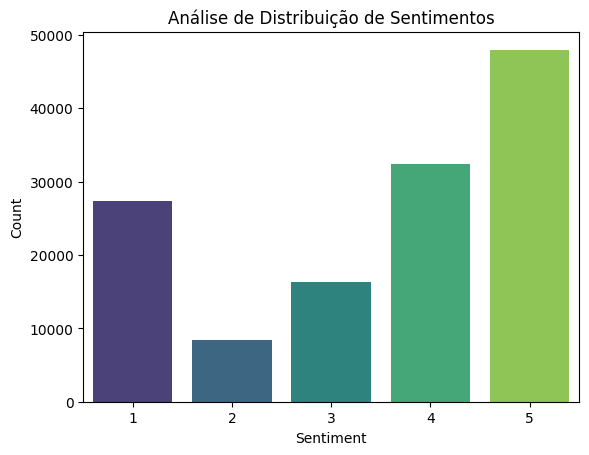

In [78]:


# Example DataFrame with sentiment labels
# Assuming 'sentiment_label' is a column in your DataFrame that stores sentiment labels (e.g., 'POSITIVE', 'NEGATIVE')
sns.countplot(x='rating', data=development_sample, palette='viridis')
plt.title('Análise de Distribuição de Sentimentos')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


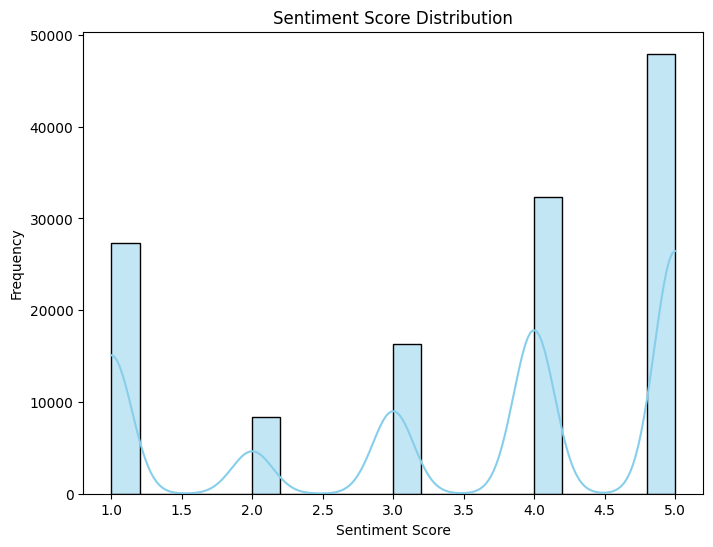

In [ ]:
# Histogram for sentiment scores
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], kde=True, color='skyblue', bins=20)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Check for missing values in the dataset
print(df.isnull().sum())

# Check the basic statistics of the 'review_text' column (e.g., length of reviews)
df['review_length'] = df['review_text'].apply(len)
print(df['review_length'].describe())

original_index               0
review_text                  0
review_text_processed        0
review_text_tokenized        0
polarity                 16315
rating                       0
kfold_polarity               0
kfold_rating                 0
dtype: int64
count    132373.000000
mean        141.778505
std         137.057280
min          50.000000
25%          68.000000
50%          97.000000
75%         160.000000
max        4548.000000
Name: review_length, dtype: float64


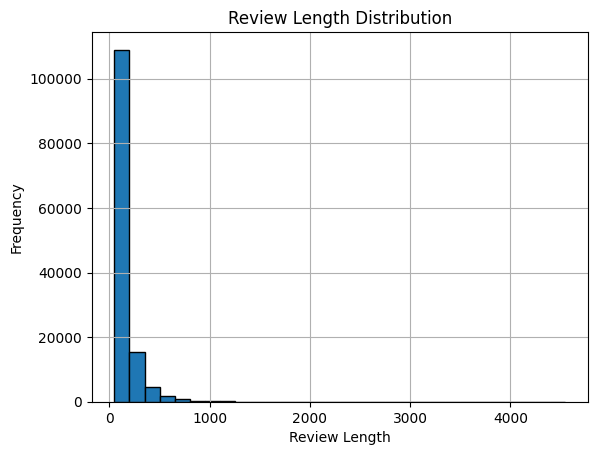

In [ ]:
# Plot distribution of review lengths
df['review_length'].hist(bins=30, edgecolor='black')
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

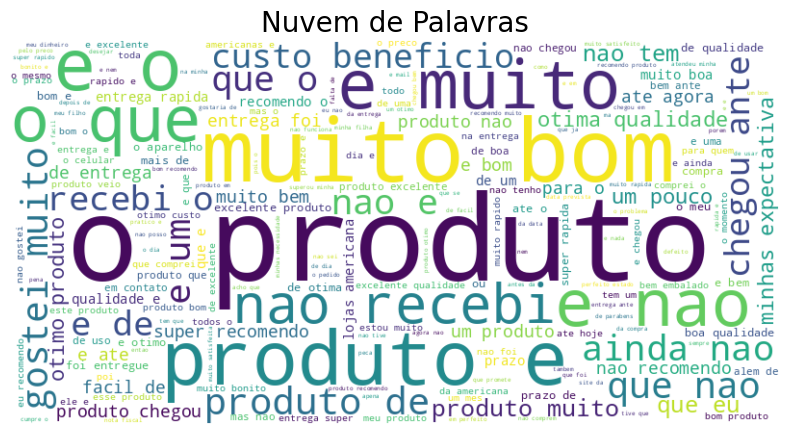

In [ ]:
# Combine all the reviews into a single string
text = ' '.join(df['review_text_processed'])

# Create a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.title("Nuvem de Palavras", fontsize=20)
plt.show()

In [ ]:
# Check the number of unique reviews and other general info
print(f"Number of unique reviews: {df['review_text'].nunique()}")
print(f"Total number of reviews: {len(df)}")

Number of unique reviews: 129792
Total number of reviews: 132373


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the necessary data for Portuguese tokenization

# Set up Portuguese stopwords
stop_words = set(stopwords.words('portuguese'))

# Define a function to clean the text
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-záéíóúãõâêîôûàèùç]+', ' ', text)  # Remove non-alphabetic characters
    words = word_tokenize(text, language='portuguese')  # Tokenize
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# Apply text cleaning
df['cleaned_review'] = df['review_text'].apply(clean_text)
print(df[['review_text', 'cleaned_review']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                         review_text  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...   
1  Produto excepcional!  recomendo!!! inovador e ...   
2  recebi o produto antes do prazo mas veio com d...   
3  Bom custo beneficio. Adequado para pessoas que...   
4  Além de higiênico tem o tamanho ideal. Só falt...   

                                      cleaned_review  
0  bem macio felpudo recomendo preço imbatível en...  
1  produto excepcional recomendo inovador gostoso...  
2  recebi produto antes prazo veio defeito trava ...  
3  bom custo beneficio adequado pessoas fazem uso...  
4  além higiênico tamanho ideal faltou colher gar...  


In [ ]:
from transformers import pipeline

# Load the sentiment analysis pipeline for Portuguese reviews
sentiment_analyzer = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Function to get sentiment for each review
def get_sentiment(text):
  result = sentiment_analyzer(text)
  return result[0]['label'], result[0]['score']

# Apply sentiment analysis to the cleaned reviews
df['sentiment_label'], df['sentiment_score'] = zip(*df['cleaned_review'].apply(get_sentiment))

# Show results
print(df[['cleaned_review', 'sentiment_label', 'sentiment_score']].head())


Device set to use cpu
Token indices sequence length is longer than the specified maximum sequence length for this model (650 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The size of tensor a (650) must match the size of tensor b (512) at non-singleton dimension 1